In [1]:
###########################
# Project 5
# ESE 572
# Routing Greedy Algorithm
###########################

import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

###### Necessary Installations for Visual ######
# pip install networkx
# pip install decorator==5.0.9
# pip install --upgrade networkx
# pip install --upgrade matplotlib
################################################

###### Basic Graph Visual Example ######
# G = nx.Graph()
# G.add_node(1)
# G.add_node(2)
# G.add_edge(1, 2)
# G.number_of_nodes()
# G.number_of_edges()
# nx.draw_networkx(G)
########################################

Kruskal's Algorithm for Minimum Spanning Tree: 
MST Edges
source -- dest -- weight
  0    --  3   --   1
  1    --  2   --   1
  2    --  3   --   1
  4    --  8   --   1
  5    --  6   --   1
  5    --  9   --   1
  0    --  4   --   2
  3    --  7   --   2
  8    --  9   --   2
Minimum Spanning Tree Total Weight: 12


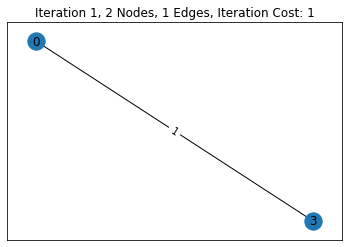

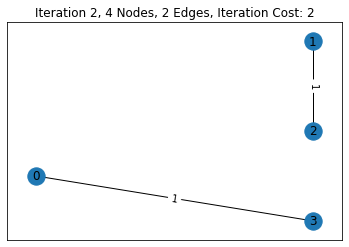

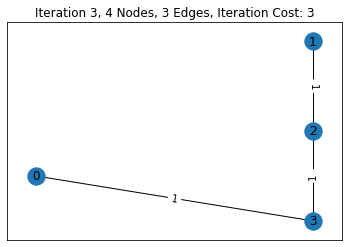

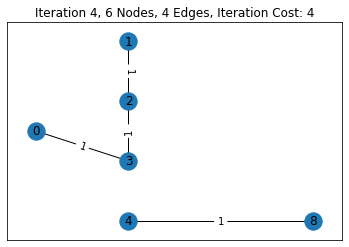

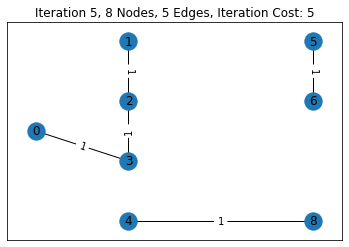

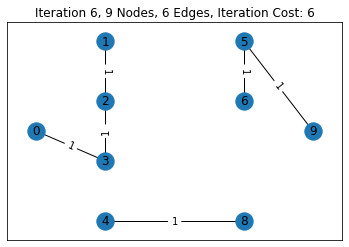

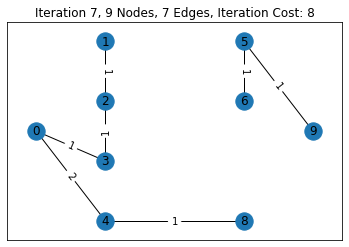

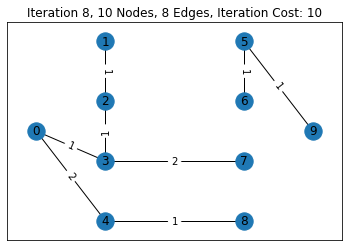

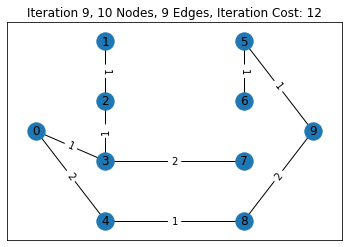

In [2]:
########################################
# Step 1: Minimum Spanning Tree
# Kruskal's Algorithm 
# Undirected and weighted graph
########################################

class Graph:
    def __init__(self,nodes):
        self.nodes = nodes
        self.graph = []
        
    def add_e(self,source,dest,weight):
        self.graph.append([source,dest,weight])
        
    def search(self,parent,i):
        if parent[i] != i:
            # reassign node's parent to root node
            parent[i] = self.search(parent,parent[i])
        return parent[i]
        
    def union(self,parent,rank,x,y):
        # attach smaller tree to higher rank tree
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
        else:
            parent[y] = x
            rank[x] += 1
        
    def kruskalMST(self):
        result = []
        pos = {0: (10, 20), 1: (15, 27.5), 2: (15, 22.5), 3: (15, 17.5), 4: (15, 12.5),
               5: (25, 27.5), 6: (25, 22.5), 7: (25, 17.5), 8: (25, 12.5), 9: (30, 20)}
        i = 0
        e = 0
        self.graph = sorted(self.graph, key=lambda x: x[2])
        parent = []
        rank = []
        
        for node in range(self.nodes):
            parent.append(node)
            rank.append(0)
        
        while e < self.nodes - 1:
            # pick smallest edge
            source,dest,weight = self.graph[i]
            i = i + 1
            x = self.search(parent,source)
            y = self.search(parent,dest)
            
            ns = [] # list of nodes to plot
            G_visual = nx.Graph()
            if x != y:
                e = e + 1
                result.append([source,dest,weight])
                self.union(parent,rank,x,y)
                
                for lst in result:
                    if lst[0] not in ns:
                        ns.append(lst[0])
                        G_visual.add_node(lst[0])
                    if lst[1] not in ns:
                        ns.append(lst[1])
                        G_visual.add_node(lst[1])
                
                iteration_cost = 0
                for lst in result:
                    G_visual.add_edge(lst[0], lst[1], weight=lst[2])
                    iteration_cost += lst[2]
                
                labels = nx.get_edge_attributes(G_visual,'weight')
                plt.figure()
                nx.draw_networkx(G_visual, pos)
                nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
                plt.title('Iteration %d, %d Nodes, %d Edges, Iteration Cost: %d' % 
                          (e, G_visual.number_of_nodes(), G_visual.number_of_edges(), iteration_cost), 
                          fontsize=12)
        
        min_cost = 0
        print("Kruskal's Algorithm for Minimum Spanning Tree: \nMST Edges")
        print("source -- dest -- weight")
        for source,dest,weight in result:
            min_cost += weight
            print("  %d    --  %d   --   %d" % (source,dest,weight))
        print("Minimum Spanning Tree Total Weight:",min_cost)
        
if __name__ == '__main__':
    G = Graph(10)
    G.add_e(0,1,2)
    G.add_e(0,3,1)
    G.add_e(0,4,2)
    G.add_e(1,2,1)
    G.add_e(2,3,1)
    G.add_e(3,4,4)
    G.add_e(1,5,6)
    G.add_e(2,6,3)
    G.add_e(3,7,2)
    G.add_e(4,8,1)
    G.add_e(5,6,1)
    G.add_e(6,7,3)
    G.add_e(7,8,4)
    G.add_e(5,9,1)
    G.add_e(6,9,3)
    G.add_e(8,9,2)
    
    G.kruskalMST()
    

In [3]:
################################
# Step 1: Minimum Spanning Tree
# RESULTS
################################

# Kruskal's Algorithm for Minimum Spanning Tree: 
# MST Edges
# source -- dest -- weight
#   0    --  3   --   1
#   1    --  2   --   1
#   2    --  3   --   1
#   4    --  8   --   1
#   5    --  6   --   1
#   5    --  9   --   1
#   0    --  4   --   2
#   3    --  7   --   2
#   8    --  9   --   2
# Minimum Spanning Tree Total Weight: 12

In [4]:
########################################
# Step 2: Shortest Path Between Nodes
# Dijkstra’s Algorithm
########################################

# Nodes: (A,J), (B,I), (A,G), (E,F), (B,J), (D,G)
#        (0,9), (1,8), (0,6), (4,6), (1,9), (3,6)

# Show each iteration as part of determining the final routing patterns

